In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super(). __init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x

In [14]:
torch.manual_seed(32)
model=Model()

In [15]:
model.fc1.weight[0][0].item()

0.3756536841392517

In [16]:
model.fc2.weight[0][0].item()

-0.21741190552711487

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('iris.csv')

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [20]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [21]:
X = df.drop('target',axis=1)
y = df['target']

In [23]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y


,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [28]:
X=X.values
y=y.values

In [29]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [32]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [33]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [36]:
epoch = 100
losses = []

for i in range (epoch):


    # Forward and get a pcredits

    y_pred = model.forward(X_train)

    # claculate loss/error
    loss = criterion(y_pred,y_train)

    losses.append(loss)

    if i % 10 == 0:
        print(f'Epoch {i} and loss is : {loss}')

    # BackPropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 0 and loss is : 1.1507114171981812
Epoch 10 and loss is : 0.9377315044403076
Epoch 20 and loss is : 0.7798256278038025
Epoch 30 and loss is : 0.6099401712417603
Epoch 40 and loss is : 0.40079930424690247
Epoch 50 and loss is : 0.25436317920684814
Epoch 60 and loss is : 0.15053048729896545
Epoch 70 and loss is : 0.10086944699287415
Epoch 80 and loss is : 0.08128313720226288
Epoch 90 and loss is : 0.07231426984071732


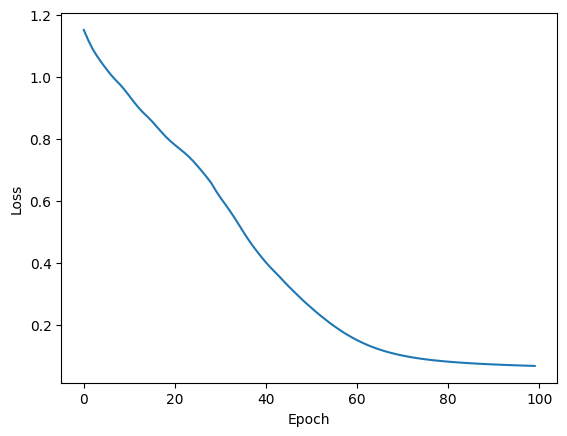

In [37]:
plt.plot(range(epoch),[loss.detach().numpy() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('Epoch');
plt.show()

In [38]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [39]:
loss

tensor(0.0581)

In [40]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1}).{str(y_val)} {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
        print(f'we got {correct} correct')

1).tensor([-2.1252,  4.8064, -0.8628]) 1
we got 1 correct
2).tensor([-1.7985,  5.3098, -1.5449]) 1
we got 2 correct
3).tensor([  6.3542,   0.8438, -10.0541]) 0
we got 3 correct
4).tensor([-3.9123,  4.5958,  1.1693]) 1
we got 4 correct
5).tensor([-7.4713,  3.2021,  5.7853]) 2
we got 5 correct
6).tensor([-10.4976,   1.6459,   9.6297]) 2
we got 6 correct
7).tensor([  6.3201,   0.9917, -10.1532]) 0
we got 7 correct
8).tensor([  7.0468,   0.7059, -10.9137]) 0
we got 8 correct
9).tensor([-7.2061,  3.3477,  5.3565]) 2
we got 9 correct
10).tensor([-9.3960,  2.5759,  8.1033]) 2
we got 10 correct
11).tensor([-9.8808,  2.3475,  8.7141]) 2
we got 11 correct
12).tensor([ 6.2748,  0.6655, -9.7613]) 0
we got 12 correct
13).tensor([-9.3142,  2.1880,  8.1947]) 2
we got 13 correct
14).tensor([-3.7803,  4.5050,  1.0752]) 1
we got 14 correct
15).tensor([-7.8657,  3.0117,  6.2303]) 2
we got 15 correct
16).tensor([-1.8867,  5.1572, -1.3345]) 1
we got 16 correct
17).tensor([-5.7006,  3.5030,  3.6696]) 2
we g

In [41]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1}).   {str(y_val.argmax().item())}    {y_test[i]}')

1).   1    1
2).   1    1
3).   0    0
4).   1    1
5).   2    2
6).   2    2
7).   0    0
8).   0    0
9).   2    2
10).   2    2
11).   2    2
12).   0    0
13).   2    2
14).   1    1
15).   2    2
16).   1    1
17).   2    2
18).   0    0
19).   1    1
20).   2    2
21).   0    0
22).   0    0
23).   2    2
24).   0    0
25).   2    2
26).   2    2
27).   1    1
28).   1    1
29).   2    2
30).   2    2


In [48]:
torch.save(model.state_dict(),'veslin212223240175_iris_model.pt')

In [49]:
new_model = Model()
new_model.load_state_dict(torch.load('veslin212223240175_iris_model.pt'))

<All keys matched successfully>

In [45]:
new_model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [46]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

In [47]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  5.9522,   1.5596, -10.0054])
tensor(0)


In [51]:
torch.save(model.state_dict(),'veslin212223240175_iris_model.pt')